In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('../data/data.csv')

In [3]:
df.head()

,title,company,city,contract_type,salary,description
0,Expert Machine learning / Data Scientist H/F,OSO-AI,29280 Plouzané,- CDI,30 000 € - 60 000 € par an,OSO-AI met en application l’Intelligence Artif...
1,Data Scientist,Euler Hermes Group,Paris (75),-,-,The role's mission is to unlock valuable and p...
2,Data Scientist SmartCity / infrastructures (35...,Eiffage Énergie Systèmes,Cesson-Sévigné (35),CDI,-,"Dans un contexte d’accroissement d’activité, n..."
3,Data Scientist junior (H/F),Natixis,75013 Paris,CDI,-,Description de l’entreprise\nNatixis Assurance...
4,Data Scientist H/F,PREDITIC,33000 Bordeaux,- CDI,2 800 € - 3 800 € par mois,Notre société PREDITIC a initié un programme d...


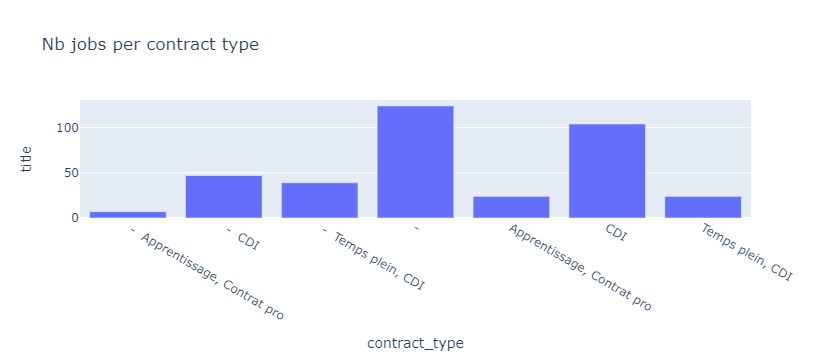

In [20]:
dfg = df.groupby('contract_type').count().reset_index()
# plot structure
fig = px.bar(dfg,
             x='contract_type',
             y='title',
             title='Nb jobs per contract type',
             barmode='stack')

# plot
fig.show()

### City 

In [5]:
pd.unique(df.city)

array(['29280 Plouzané', 'Paris (75)', 'Cesson-Sévigné (35)',
       '75013 Paris', '33000 Bordeaux', 'Montrouge (92)',
       '92300 Levallois-Perret', 'Paris 13e (75)', 'Rennes (35)',
       '75008 Paris', 'Issy-les-Moulineaux (92)', 'Maisons-Alfort (94)',
       'Le Plessis-Robinson (92)', 'Roubaix (59)',
       '73290 La Motte-Servolex', 'Clermont-Ferrand (63)',
       'Boulogne-Billancourt (92)', 'Angers (49)', 'Courbevoie (92)'],
      dtype=object)

In [15]:
# takes a string and returns the same strings but only with characters that are letters
def get_letters(value):
    return ''.join([i for i in value if i.isalpha()])

In [17]:
#clean the city variable, by removing the postal codes or parentheses
df['city_letters'] = df.city.apply(get_letters)

In [18]:
pd.unique(df.city_letters)

array(['Plouzané', 'Paris', 'CessonSévigné', 'Bordeaux', 'Montrouge',
       'LevalloisPerret', 'Parise', 'Rennes', 'IssylesMoulineaux',
       'MaisonsAlfort', 'LePlessisRobinson', 'Roubaix', 'LaMotteServolex',
       'ClermontFerrand', 'BoulogneBillancourt', 'Angers', 'Courbevoie'],
      dtype=object)

### Contract type 

In [21]:
pd.unique(df.contract_type)

array([' -  CDI', '-', 'CDI', 'Apprentissage, Contrat pro',
       'Temps plein, CDI', ' -  Temps plein, CDI',
       ' -  Apprentissage, Contrat pro'], dtype=object)

In [22]:
df.contract_type[0]

' -  CDI'

In [26]:
df.loc[df['contract_type'].str.contains("CDI", case=False)].contract_type

0                    -  CDI
2                       CDI
3                       CDI
4                    -  CDI
6          Temps plein, CDI
               ...         
358                     CDI
360                  -  CDI
362        Temps plein, CDI
364     -  Temps plein, CDI
368                     CDI
Name: contract_type, Length: 214, dtype: object